In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import norm, zscore, kstest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, roc_auc_score, auc
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20


In [ ]:
#!pip3 install gdown

## EDA

In [ ]:
import gdown

# Reemplaza 'URL_del_enlace_compartido' con tu enlace compartido de Google Drive
url = 'https://drive.google.com/u/0/uc?id=1_SMfdx4_MsGZ_GaXDj2w5cjv5Kr8XPLe&export=download'

# Descarga el archivo en el directorio actual
output = 'Online_Payments_Fraud_Detection_Dataset.csv'
gdown.download(url, output, quiet=False)
fraud_df = pd.read_csv("Online_Payments_Fraud_Detection_Dataset.csv")
print(fraud_df.shape)
fraud_df.head()

Downloading...
From: https://drive.google.com/u/0/uc?id=1_SMfdx4_MsGZ_GaXDj2w5cjv5Kr8XPLe&export=download
To: /content/Online_Payments_Fraud_Detection_Dataset.csv
100%|██████████| 494M/494M [00:07<00:00, 67.3MB/s]


(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#se elimina isFlaggedFraud
fraud_df.drop(columns = ['isFlaggedFraud', 'nameOrig', 'nameDest'], inplace=True)
fraud_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
quantitative = fraud_df.select_dtypes(exclude = 'object').columns.to_list()
quantitative.remove('isFraud')
print(quantitative)
qualitative = fraud_df.select_dtypes(include = 'object').columns.to_list()
print(qualitative)

['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
['type']


1. Analisis univariado

In [ ]:
#descritivos de cuantitativos
fraud_df[quantitative].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


In [ ]:
#descritivos de cualitativos
fraud_df[qualitative].describe()

,type
count,6362620
unique,5
top,CASH_OUT
freq,2237500


<Axes: >

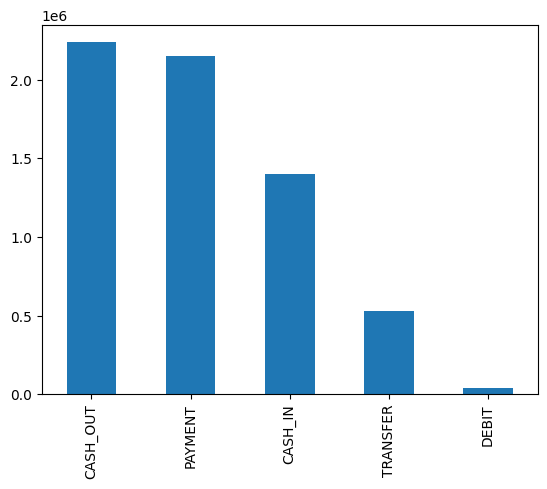

In [ ]:
#type
fraud_df.type.value_counts().plot(kind='bar')

In [ ]:
fraud_df.groupby(by = 'type')['amount'].agg(['min', 'mean', 'max'])

,min,mean,max
type,,,
CASH_IN,0.04,168920.242004,1915267.90
CASH_OUT,0.00,176273.964346,10000000.00
DEBIT,0.55,5483.665314,569077.51
PAYMENT,0.02,13057.604660,238637.98
TRANSFER,2.60,910647.009645,92445516.64


[]

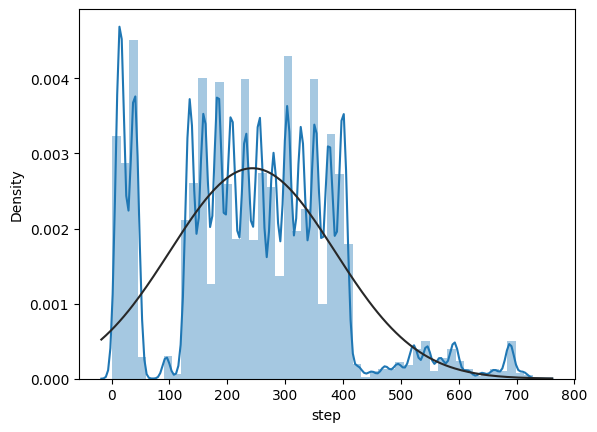

In [ ]:
# Histograma de distribucion de cuantitativos
#step
sns.distplot(fraud_df['step'], fit = norm)
plt.plot()

[]

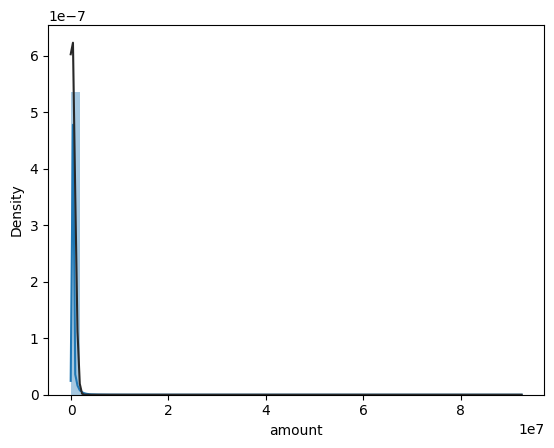

In [ ]:
#amount
sns.distplot(fraud_df['amount'], fit = norm)
plt.plot()

[]

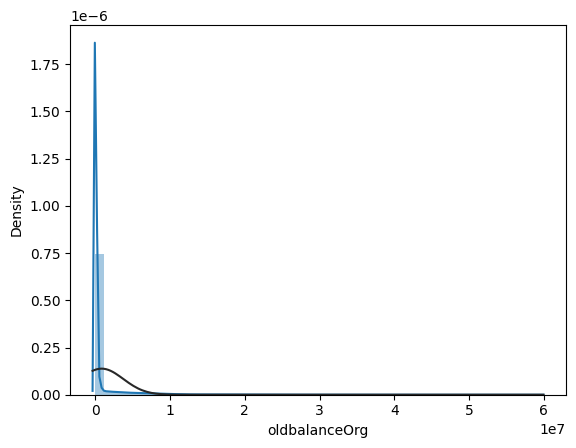

In [ ]:
#amount
sns.distplot(fraud_df['oldbalanceOrg'], fit = norm)
plt.plot()

[]

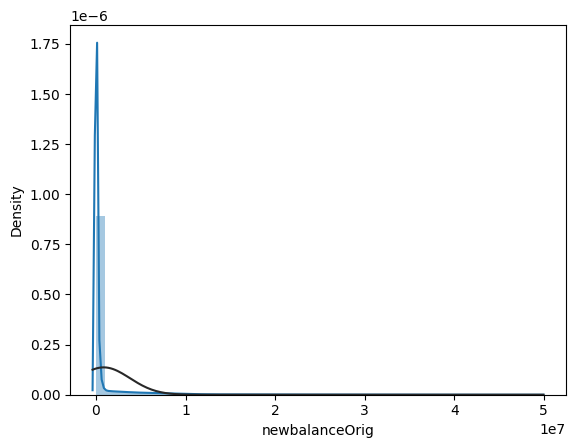

In [ ]:
#amount
sns.distplot(fraud_df['newbalanceOrig'], fit = norm)
plt.plot()

[]

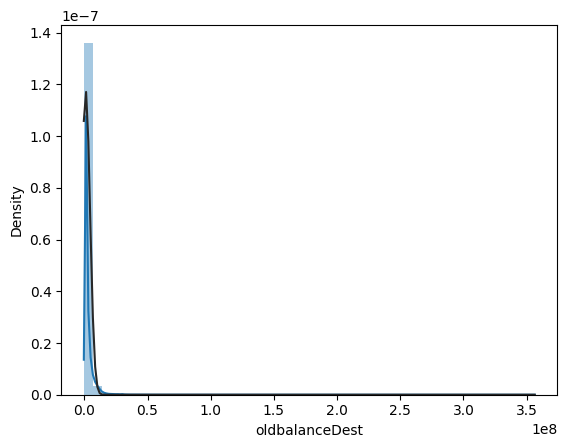

In [ ]:
#amount
sns.distplot(fraud_df['oldbalanceDest'], fit = norm)
plt.plot()

[]

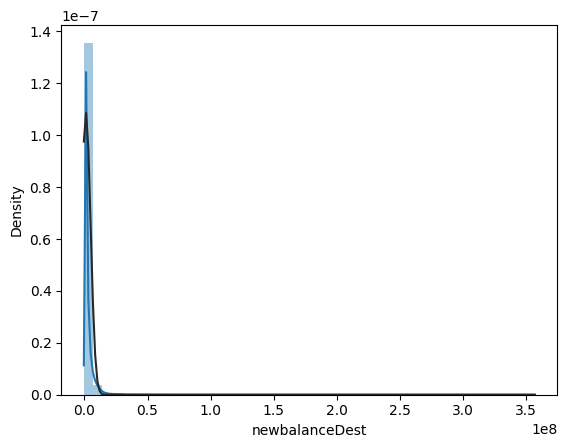

In [ ]:
#amount
sns.distplot(fraud_df['newbalanceDest'], fit = norm)
plt.plot()

In [ ]:
# Asimetría y curtosis:
print("Skewness: %f" % fraud_df['amount'].skew())
print("Kurtosis: %f" % fraud_df['amount'].kurt())

#La Curtosis es mayor que cero, entonces la curva es leptocúrtica, por lo que hay mayor probabilidad de encontrar outliers.

Skewness: 30.993949
Kurtosis: 1797.956705


In [ ]:
# Asimetría y curtosis:
print("Skewness: %f" % fraud_df['step'].skew())
print("Kurtosis: %f" % fraud_df['step'].kurt())


Skewness: 0.375177
Kurtosis: 0.329071


variables numericas

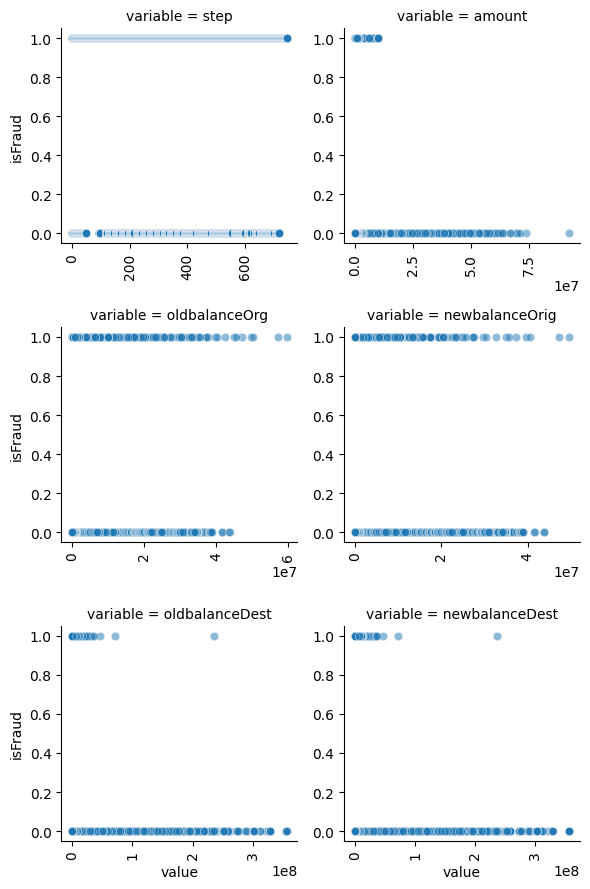

In [ ]:
# Diagrama de dispersión de cuantitativas
def scatterplot_func(x, y, **kwargs):
    sns.scatterplot(x=x, y=y, alpha = 0.5)
    x=plt.xticks(rotation=90)

# Le aplicamos unpivot al dataframe por cada variable cuantitativa
f = pd.melt(frame = fraud_df, id_vars=['isFraud'], value_vars=quantitative)
# Creamos las parcelas donde colocaremos nuestros gráficos
g = sns.FacetGrid(data = f, col="variable",  col_wrap=2, sharex=False, sharey=False)
# Poblamos las parcelas con los gráficos
g = g.map(scatterplot_func, "value", "isFraud")

variables cuantitativas

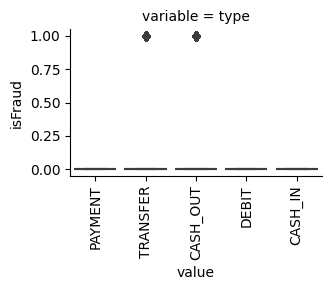

In [ ]:
def variable_categorica(df, qualitative):
  for c in qualitative:
    #convertimos a categoría
    df[c] = df[c].astype('category')
variable_categorica(fraud_df, qualitative)

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

# Le aplicamos unpivot al dataframe por cada variable cualitativa
f = pd.melt(fraud_df, id_vars=['isFraud'], value_vars=qualitative)
# Creamos las parcelas donde colocaremos nuestros gráficos
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
# Poblamos las parcelas con los gráficos
g = g.map(boxplot, "value", "isFraud")

### Tratamiento de Outliers

Vemos que los outliers generales se encuentran en ciertas características. Por ello es que eliminamos los outliers por categoría.

Eliminaremos los outliers por categoría de transacción.

In [ ]:
def remove_outliers_by_category(df, category_column, value_column, threshold=2):
    # Crear una serie booleana que indica si cada fila es un outlier
    df['Outlier'] = df.groupby(category_column)[value_column].transform(lambda x: (zscore(x) > threshold) | (zscore(x) < -threshold))

    # Eliminar filas que son outliers
    df_filtered = df[df['Outlier'] == False].drop(columns='Outlier')

    return df_filtered

In [ ]:
fraud_df = remove_outliers_by_category(fraud_df, 'type', 'amount')

## Balanceo de datos

### Balanceo de categorías

In [ ]:
fraud_df.groupby(by = ['isFraud', 'type'])['type'].count()

isFraud  type    
0        CASH_IN     1336273
         CASH_OUT    2195374
         DEBIT         40621
         PAYMENT     2046534
         TRANSFER     517180
1        CASH_IN           0
         CASH_OUT       2231
         DEBIT             0
         PAYMENT           0
         TRANSFER       3697
Name: type, dtype: int64

De lo anterior, solo consideramos el tipo de transacción CASH_OUT y TRANSFER para las clases 0 y 1.

In [ ]:
fraud_df = fraud_df[fraud_df['type'].isin(['CASH_OUT','TRANSFER'])]
fraud_df['type'].unique()

['TRANSFER', 'CASH_OUT']
Categories (5, object): ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

Ya hemos uniformizado los tipos de transacciones.

In [ ]:
fraud_df.groupby(by = ['isFraud', 'type'])['type'].count()

isFraud  type    
0        CASH_IN           0
         CASH_OUT    2195374
         DEBIT             0
         PAYMENT           0
         TRANSFER     517180
1        CASH_IN           0
         CASH_OUT       2231
         DEBIT             0
         PAYMENT           0
         TRANSFER       3697
Name: type, dtype: int64

De lo anterior, vemos que tenemos más registros de la clase 0 que de la clase 1, por ello vamos a realizar un submuestreo por cada clase.

## Balanceo de clases

In [ ]:
y = fraud_df['isFraud']
X = fraud_df.drop('isFraud', axis=1)

Hacemos un submuestreo de la clase mayoritaria.

In [ ]:
os =  RandomUnderSampler(sampling_strategy=0.5, random_state = 1)
X_res, y_res = os.fit_resample(X, y)
print ("Distribution of class labels before resampling {}".format(Counter(y)))
print ("Distribution of class labels after resampling {}".format(Counter(y_res)))

Distribution of class labels before resampling Counter({0: 2712554, 1: 5928})
Distribution of class labels after resampling Counter({0: 11856, 1: 5928})


In [ ]:
fraud_df = pd.concat([X_res, y_res], axis = 1)
fraud_df.groupby(by = ['isFraud', 'type'])['type'].count()

isFraud  type    
0        CASH_IN        0
         CASH_OUT    9579
         DEBIT          0
         PAYMENT        0
         TRANSFER    2277
1        CASH_IN        0
         CASH_OUT    2231
         DEBIT          0
         PAYMENT        0
         TRANSFER    3697
Name: type, dtype: int64

Vemos que la data ya está mejor balanceada.

### Encoding

Una forma de encodear es creando variables dummy(binarias).

In [ ]:
fraud_df = pd.get_dummies(fraud_df)

## Análisis bivariable

Para ello realizaremos las siguientes pruebas de correlación:

- Matriz de correlación general.

### Matriz de correlación general

In [ ]:
fraud_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,476,219146.41,2460.05,0.00,3349443.11,3568589.53,0,0,1,0,0,0
1,306,796308.52,41277.00,0.00,478068.63,1274377.16,0,0,0,0,0,1
2,321,66773.25,0.00,0.00,197079.47,263852.72,0,0,1,0,0,0
3,352,147345.61,101433.00,0.00,794873.70,942219.31,0,0,1,0,0,0
4,355,217972.47,255296.00,37323.53,25839.59,243812.06,0,0,1,0,0,0


In [ ]:
columnas_numericas = fraud_df.drop(columns = ['step', 'type_CASH_OUT', 'type_TRANSFER']).columns.tolist()
columnas_numericas

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'type_CASH_IN',
 'type_DEBIT',
 'type_PAYMENT']

<Axes: >

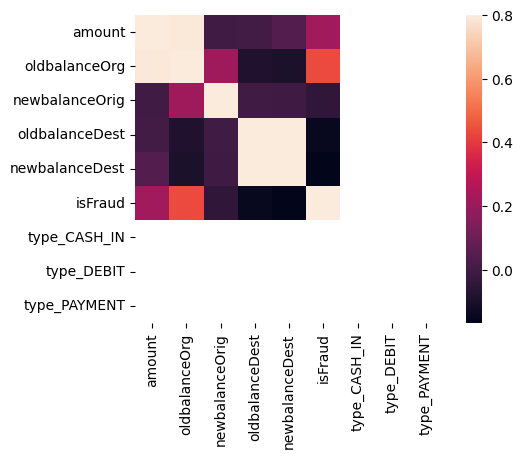

In [ ]:
# Matriz de correlación
corrmat = fraud_df[columnas_numericas].corr()
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corrmat, vmax=.8, square=True)

Vemos multicolinealidades entre oldbalanceOrg y amount, oldbalanceDest y newbalanceDest. Procederemos a eliminar oldbalanceOrg y oldbalanceDest.

In [ ]:
fraud_df.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [ ]:
fraud_df = fraud_df.drop(columns = ['oldbalanceOrg', 'oldbalanceDest'])

## Limpieza de datos



In [ ]:
fraud_df.isna().sum()

step              0
amount            0
newbalanceOrig    0
newbalanceDest    0
isFraud           0
type_CASH_IN      0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64

**Conclusión**  
No tenemos valores nulos.

### Datos duplicados

In [ ]:
fraud_df[fraud_df.duplicated()].shape

(1, 10)

In [ ]:
fraud_df[fraud_df.duplicated()]

,step,amount,newbalanceOrig,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
17027,646,0.0,0.0,0.0,1,0,1,0,0,0


Tenemos un duplicado. Procedemos a eliminarlo.

In [ ]:
fraud_df = fraud_df.drop_duplicates()
fraud_df.shape

(17783, 10)

## Comprobando supuestos

Comprobaremos normalidad en la variable amount.

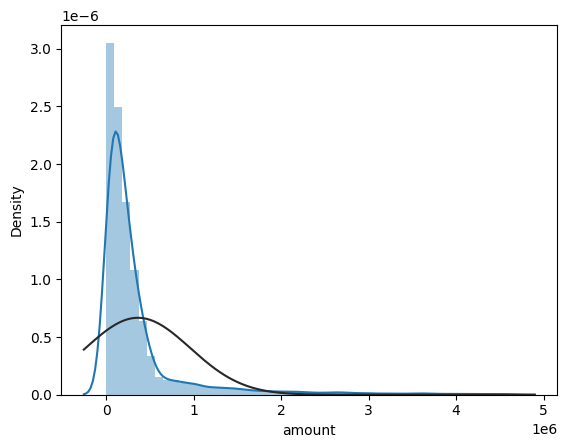

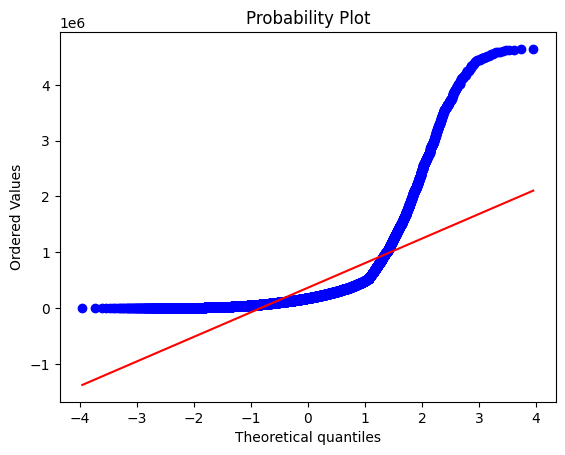

In [ ]:
# Histograma y gráfico de probabilidad normal:
sns.distplot(fraud_df['amount'], fit = norm)
fig = plt.figure()
res = stats.probplot(fraud_df['amount'], plot = plt)

Parece que amount no se ajusta a una distribución normal.

### Test de normalidad  

- Test de Kolmogorov-Smirnov:
  - Hipótesis nula ($H_0$): La muestra sigue una distribución normal.
  - Hipótesis alternativa ($H_1$): La muestra no sigue una distribución normal.

¿Los montos de transacción se ajustan a una distribución normal?

In [ ]:
#from scipy import stats
stat_ks, p_value = kstest(fraud_df["amount"], stats.norm.cdf)
stat_ks, p_value

(0.9991564977787775, 0.0)

p-value < 0.05, por lo tanto el campo amount no sigue una distribución normal.

Guardamos los resultados.

In [ ]:
fraud_df.to_csv("fraud_df_balanceado_sin_multicolinealidad.csv", index = False)

Leemos el archivo guardado

In [ ]:
fraud_df = pd.read_csv("fraud_df_balanceado_sin_multicolinealidad.csv")

## Modelos de Machine Learning

### Modelo 1: Regresión logística

In [ ]:
#https://k-dm.work/es/eval/classification/roc-auc/
def plot_roc_curve(test_y, pred_y):
    """Trazar la curva ROC a partir de las respuestas correctas y las predicciones

    Args:
        test_y (ndarray of shape (n_samples,)): y
        pred_y (ndarray of shape (n_samples,)): Valor previsto para y
    """
    # Tasa de falsos positivos, tasa de verdaderos positivos
    fprs, tprs, thresholds = roc_curve(test_y, pred_y)

    # gráfico ROC-AUC
    plt.figure(figsize=(4, 4))
    plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
    plt.plot(fprs, tprs, color="orange", label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Rellene el área correspondiente a la puntuación ROC-AUC
    y_zeros = [0 for _ in tprs]
    plt.fill_between(fprs, y_zeros, tprs, color="orange", alpha=0.3, label="ROC-AUC")
    plt.legend()
    plt.show()

## Selección de data de entrenamiento y prueba

In [ ]:
y = fraud_df['isFraud']
X = fraud_df.drop('isFraud', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 1, stratify=y)

### Entrenamiento del modelo

In [ ]:
modelo_lr = LogisticRegression()

### Validación cruzada

In [ ]:
kfold_validacion = KFold(10)
resultados = cross_val_score(modelo_lr, X, y, cv = kfold_validacion)
print("Resultados de validación cruzada (precisión): ", resultados)
print("Precisión media:", resultados.mean())

Resultados de validación cruzada (precisión):  [0.76559865 0.77571669 0.74423834 0.75253093 0.77502812 0.76209224
 0.74578178 0.70022497 0.47075366 0.18222722]
Precisión media: 0.6674192601978717


## Optimización de hiperparámetros

In [ ]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'C': [100, 10, 1.0, 0.1, 0.01]
}

grid_search = GridSearchCV(estimator=modelo_lr, param_grid = param_grid, cv=kfold_validacion, scoring='roc_auc')
grid_result = grid_search.fit(X_train, y_train)
# summarize results

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print("Resultados de grid_search")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Mejor: %f y sus parámetros son %s" % (grid_result.best_score_, grid_result.best_params_))

Resultados de grid_search
0.846475 (0.014174) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.874548 (0.009766) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.871338 (0.009957) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.845494 (0.012517) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.874548 (0.009766) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.871338 (0.009957) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.845297 (0.012529) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.874548 (0.009766) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.871338 (0.009957) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.845569 (0.012296) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.874548 (0.009766) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.871338 (0.009957) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.847992 (0.012550) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'new

In [ ]:
best_params = grid_search.best_params_

# Evalúa el modelo en el conjunto de prueba
auc_roc = grid_search.score(X_test, y_test)

print("Mejores hiperparámetros:", best_params)
print("roc_auc en el conjunto de prueba:", auc_roc)

Mejores hiperparámetros: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
roc_auc en el conjunto de prueba: 0.8751108810302283


### Entrenamiento de modelo optimizado

In [ ]:
#Entrenamos el modelo con los hiperparámetros óptimos
modelo_lr = LogisticRegression(**best_params)
modelo_lr.fit(X = X_train, y = y_train)

LogisticRegression(C=100)

In [ ]:
# Confusion Matrix
y_pred = modelo_lr.predict(X = X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      3557
           1       0.72      0.78      0.75      1778

    accuracy                           0.82      5335
   macro avg       0.80      0.81      0.80      5335
weighted avg       0.83      0.82      0.82      5335



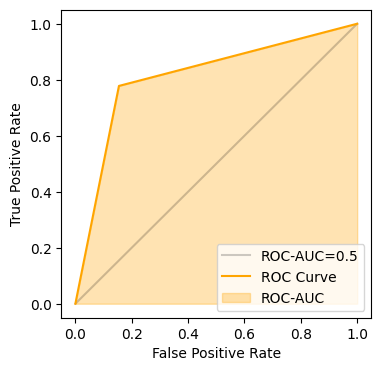

In [ ]:
plot_roc_curve(y_test, y_pred)

In [ ]:
roc_auc_score(y_test, y_pred)

0.8116077931220081

### Modelo 2: Árbol de clasificación

In [ ]:
modelo_t = tree.DecisionTreeClassifier(random_state=1)

In [ ]:
kfold_validacion = KFold(10)
resultados = cross_val_score(modelo_t, X, y, cv = kfold_validacion)
print("Resultados de validación cruzada (precisión): ", resultados)
print("Precisión media:", resultados.mean())

Resultados de validación cruzada (precisión):  [0.91118606 0.90781338 0.90163013 0.89595051 0.89313836 0.9015748
 0.66816648 0.3503937  0.63273341 0.62204724]
Precisión media: 0.7684634066610139


In [ ]:
param_grid = {
	'criterion': ['gini', 'entropy', 'log_loss'],
	'max_depth': [1,2,3,4]
}

grid_search = GridSearchCV(estimator=modelo_t, param_grid = param_grid, cv=kfold_validacion, scoring='roc_auc')
grid_result = grid_search.fit(X_train, y_train)
# summarize results

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print("Resultados de grid_search")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Mejor: %f y sus parámetros son %s" % (grid_result.best_score_, grid_result.best_params_))

Resultados de grid_search
0.809740 (0.008504) with: {'criterion': 'gini', 'max_depth': 1}
0.880796 (0.006030) with: {'criterion': 'gini', 'max_depth': 2}
0.902038 (0.006655) with: {'criterion': 'gini', 'max_depth': 3}
0.919646 (0.007977) with: {'criterion': 'gini', 'max_depth': 4}
0.809923 (0.008601) with: {'criterion': 'entropy', 'max_depth': 1}
0.880837 (0.006028) with: {'criterion': 'entropy', 'max_depth': 2}
0.902017 (0.004644) with: {'criterion': 'entropy', 'max_depth': 3}
0.913323 (0.005581) with: {'criterion': 'entropy', 'max_depth': 4}
0.809923 (0.008601) with: {'criterion': 'log_loss', 'max_depth': 1}
0.880837 (0.006028) with: {'criterion': 'log_loss', 'max_depth': 2}
0.902017 (0.004644) with: {'criterion': 'log_loss', 'max_depth': 3}
0.913323 (0.005581) with: {'criterion': 'log_loss', 'max_depth': 4}
Mejor: 0.919646 y sus parámetros son {'criterion': 'gini', 'max_depth': 4}


In [ ]:
best_params = grid_search.best_params_

# Evalúa el modelo en el conjunto de prueba
auc_roc = grid_search.score(X_test, y_test)

print("Mejores hiperparámetros:", best_params)
print("roc_auc en el conjunto de prueba:", auc_roc)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 4}
roc_auc en el conjunto de prueba: 0.9176999487377825


### Entrenamiento de modelo optimizado

In [ ]:
#Entrenamos el modelo con los hiperparámetros óptimos
modelo_t = tree.DecisionTreeClassifier(random_state = 1, **best_params)
modelo_t.fit(X = X_train, y = y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [ ]:
# Confusion Matrix
y_pred = modelo_t.predict(X = X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3557
           1       0.90      0.81      0.85      1778

    accuracy                           0.91      5335
   macro avg       0.90      0.88      0.89      5335
weighted avg       0.91      0.91      0.91      5335



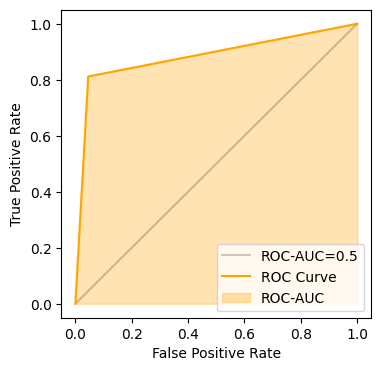

In [ ]:
plot_roc_curve(y_test, y_pred)

In [ ]:
roc_auc_score(y_test, y_pred)

0.8830210269963091

### Modelo 3: SVC

In [ ]:
# SVM
modelo_svm = SVC()

In [ ]:
kfold_validacion = KFold(5)
resultados = cross_val_score(modelo_svm, X, y, cv = kfold_validacion)
print("Resultados de validación cruzada (precisión): ", resultados)
print("Precisión media:", resultados.mean())

Resultados de validación cruzada (precisión):  [0.81079561 0.82457127 0.80601631 0.55568054 0.27249719]
Precisión media: 0.6539121831727741


In [ ]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

In [ ]:
grid_search = GridSearchCV(estimator=modelo_svm, param_grid = param_grid, cv=kfold_validacion, scoring='roc_auc')
grid_result = grid_search.fit(X_train, y_train)

# summarize results

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print("Resultados de grid_search")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Mejor: %f y sus parámetros son %s" % (grid_result.best_score_, grid_result.best_params_))


Resultados de grid_search
0.501928 (0.000963) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.502894 (0.001550) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.510954 (0.002379) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.501928 (0.000963) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.502894 (0.001550) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.511859 (0.002208) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.501928 (0.000963) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.502894 (0.001550) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.511977 (0.002314) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mejor: 0.511977 y sus parámetros son {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
best_params = grid_search.best_params_

# Evalúa el modelo en el conjunto de prueba
auc_roc = grid_search.score(X_test, y_test)

print("Mejores hiperparámetros:", best_params)
print("roc_auc en el conjunto de prueba:", auc_roc)

Mejores hiperparámetros: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
roc_auc en el conjunto de prueba: 0.5133221680154753


### Entrenamiento de modelo optimizado

In [ ]:
#Entrenamos el modelo con los hiperparámetros óptimos
modelo_svm = SVC(**best_params)
modelo_svm.fit(X = X_train, y = y_train)

# Evalúa el modelo en el conjunto de prueba
auc_roc = grid_search.score(X_test, y_test)

print("Mejores hiperparámetros:", best_params)
print("roc_auc en el conjunto de prueba:", auc_roc)

Mejores hiperparámetros: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
roc_auc en el conjunto de prueba: 0.5133221680154753


In [ ]:
# Confusion Matrix
y_pred = modelo_svm.predict(X = X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      3557
           1       1.00      0.00      0.01      1778

    accuracy                           0.67      5335
   macro avg       0.83      0.50      0.40      5335
weighted avg       0.78      0.67      0.54      5335



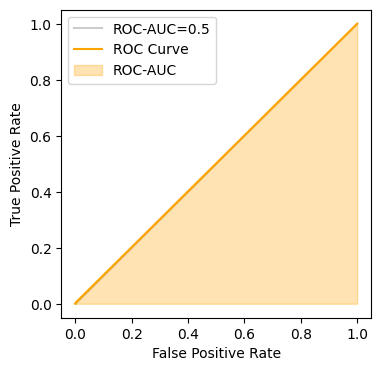

In [ ]:
plot_roc_curve(y_test, y_pred)

In [ ]:
roc_auc_score(y_test, y_pred)

0.5014060742407199

In [ ]:
models = {
    'Logistic Regression': modelo_lr,
    'Decision Tree': modelo_t,
    'SVM': modelo_svm
}

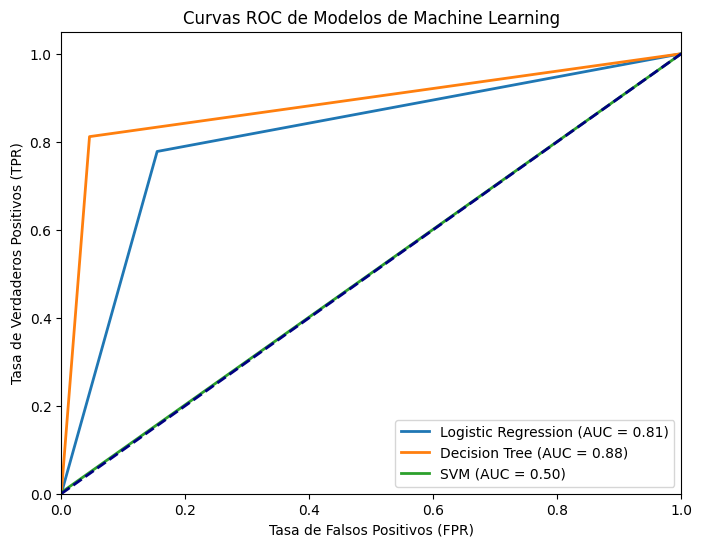

In [ ]:
y_score = {}
for name, model in models.items():
    y_score[name] = model.predict(X_test)

# Calcular las curvas ROC y el área bajo la curva (AUC)
plt.figure(figsize=(8, 6))
for i, (name, score) in enumerate(y_score.items()):
    fpr, tpr, _ = roc_curve(y_test, score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Configurar el gráfico
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC de Modelos de Machine Learning')
plt.legend(loc="lower right")

Notamos que el modelo óptimo es el árbol de clasificación, que tiene un AUC de 0.88. Veamos la lógica de clasificación que sigue el árbol.

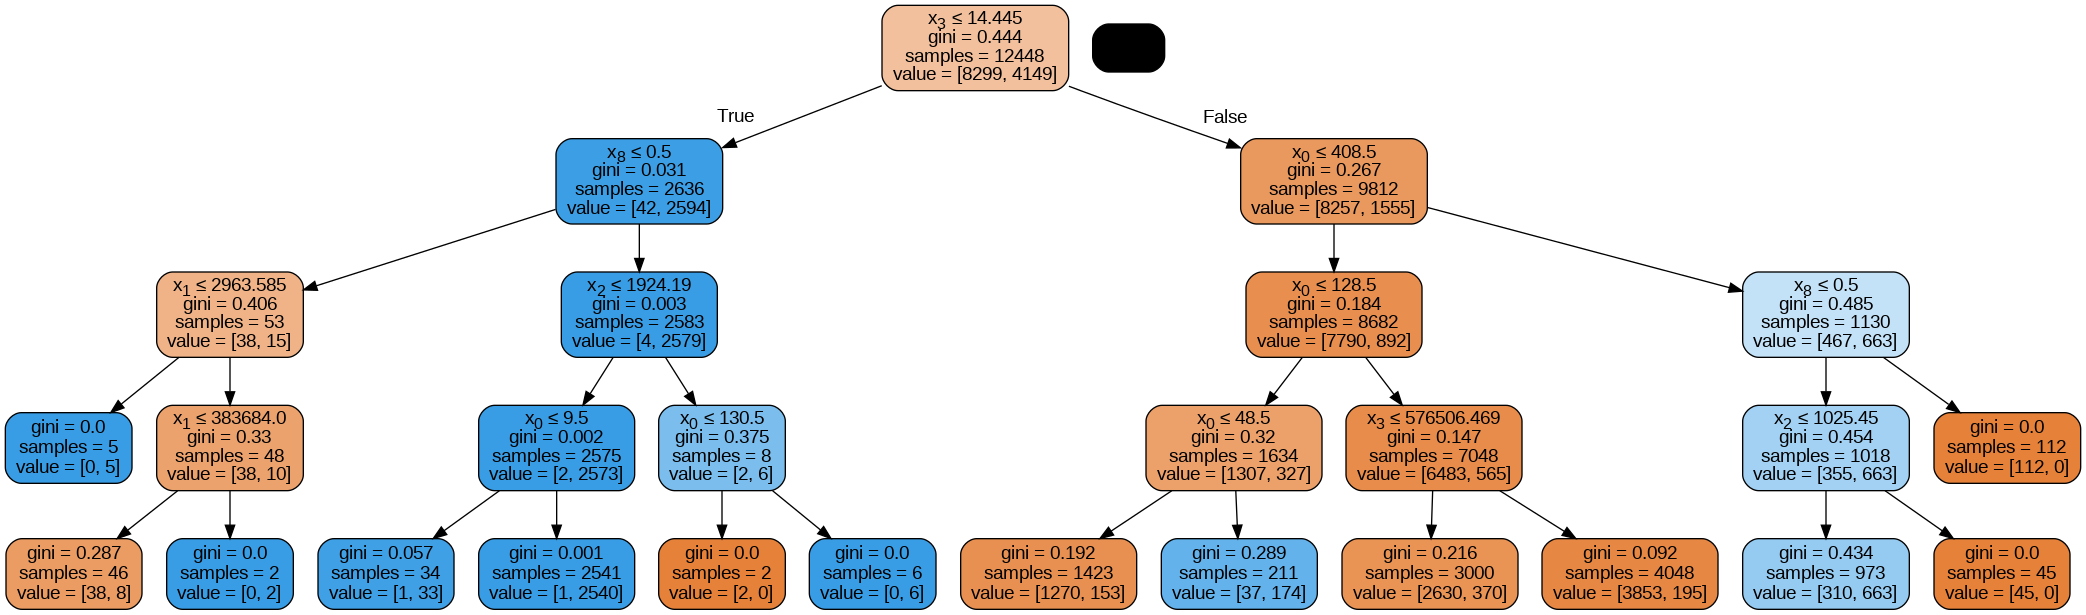

In [ ]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(modelo_t, out_file = dot_data,
                filled = True, rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#==================MUCHAS GRACIAS ============

In [ ]:
import IPython
IPython.display.Image(url='https://raw.githubusercontent.com/Juniorcandela/datasets/main/LogoDGC.webp')